In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

#### Hyper-Parameters

In [2]:
input_size = 1 # 1차원 데이터
output_size = 1 # 1차원 데이터
num_epochs = 200 # 반복 횟수
learning_rate = 0.001

#### Toy DataSets

In [3]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

x_train
y_train

array([[1.7  ],
       [2.76 ],
       [2.09 ],
       [3.19 ],
       [1.694],
       [1.573],
       [3.366],
       [2.596],
       [2.53 ],
       [1.221],
       [2.827],
       [3.465],
       [1.65 ],
       [2.904],
       [1.3  ]], dtype=float32)

In [4]:
'''
1. 모델생성
2. loss, optimizer 선정의
3. 모델에 데이터를 입력하고 그 결과로 예측값을 반환 받는다.
4. 예측값이 반환되면 Loss를 알 수 있다.(이때 2번에 미리 정의된 loss함수를 호출)
5. loss.backward() --> Loss에 대한 책임을 W에 묻는다() -> 편미분 적용
6. 5번의 결과를 가지고 학습을 진행

3-6 과정을 총 100번 진행한다. num_epochs = 100
'''

'\n1. 모델생성\n2. loss, optimizer 선정의\n3. 모델에 데이터를 입력하고 그 결과로 예측값을 반환 받는다.\n4. 예측값이 반환되면 Loss를 알 수 있다.(이때 2번에 미리 정의된 loss함수를 호출)\n5. loss.backward() --> Loss에 대한 책임을 W에 묻는다() -> 편미분 적용\n6. 5번의 결과를 가지고 학습을 진행\n\n3-6 과정을 총 100번 진행한다. num_epochs = 100\n'

#### Linear Regression Model

In [5]:
model = nn.Linear(input_size, output_size)

#### Loss Function and Optimizer

In [6]:
loss_function = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train Model

In [7]:
for epoch in range(num_epochs) : # 100번 학습한다.
    # numpy arrays를 torch의 Tensor로 만들어서 머신에 입력해야 함.
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)
    
    # Forward Pass
    pred = model(inputs)
    loss = loss_function(pred, targets)
    
    # Backward and Optimizer
    optimizer.zero_grad() # 이 부분이 가장 먼저나와야 함.. 초기화
    loss.backward()
    optimizer.step()
    
    if(epoch+1)%5 == 0:
        print('Epoch[{}/{}], Loss:{:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch[5/200], Loss:0.7261
Epoch[10/200], Loss:0.3963
Epoch[15/200], Loss:0.2626
Epoch[20/200], Loss:0.2085
Epoch[25/200], Loss:0.1866
Epoch[30/200], Loss:0.1777
Epoch[35/200], Loss:0.1741
Epoch[40/200], Loss:0.1726
Epoch[45/200], Loss:0.1720
Epoch[50/200], Loss:0.1718
Epoch[55/200], Loss:0.1717
Epoch[60/200], Loss:0.1716
Epoch[65/200], Loss:0.1716
Epoch[70/200], Loss:0.1716
Epoch[75/200], Loss:0.1716
Epoch[80/200], Loss:0.1716
Epoch[85/200], Loss:0.1715
Epoch[90/200], Loss:0.1715
Epoch[95/200], Loss:0.1715
Epoch[100/200], Loss:0.1715
Epoch[105/200], Loss:0.1715
Epoch[110/200], Loss:0.1715
Epoch[115/200], Loss:0.1715
Epoch[120/200], Loss:0.1715
Epoch[125/200], Loss:0.1715
Epoch[130/200], Loss:0.1715
Epoch[135/200], Loss:0.1715
Epoch[140/200], Loss:0.1715
Epoch[145/200], Loss:0.1715
Epoch[150/200], Loss:0.1715
Epoch[155/200], Loss:0.1715
Epoch[160/200], Loss:0.1714
Epoch[165/200], Loss:0.1714
Epoch[170/200], Loss:0.1714
Epoch[175/200], Loss:0.1714
Epoch[180/200], Loss:0.1714
Epoch[185/20

#### Plot the Graph

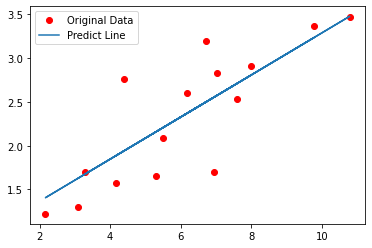

In [8]:
# 시각화 할때는 다시 Tensor에서 Numpy로 다시 만들어야함
predict = model(torch.from_numpy(x_train)).detach().numpy()

plt.plot(x_train, y_train,'ro', label ='Original Data')
plt.plot(x_train,predict,label ='Predict Line')
plt.legend()
plt.show()

torch.save(model.state_dict(),'model.ckpt')